# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.165873e+01     8.834710e+00
 * time: 0.002836942672729492
     1     2.922562e+01     4.926405e+00
 * time: 0.009330987930297852
     2     2.653272e+01     9.602750e+00
 * time: 0.01904606819152832
     3     2.614579e+01     1.141625e+01
 * time: 0.026654958724975586
     4     1.416592e+01     3.729156e+00
 * time: 0.03472590446472168
     5     1.208020e+01     3.822915e+00
 * time: 0.04144906997680664
     6     1.081466e+01     2.106186e+00
 * time: 0.04760289192199707
     7     9.471804e+00     1.469497e+00
 * time: 0.05336308479309082
     8     8.821420e+00     8.247297e-01
 * time: 0.059741973876953125
     9     8.508827e+00     9.598706e-01
 * time: 0.06611204147338867
    10     8.314038e+00     7.533198e-01
 * time: 0.07279706001281738
    11     8.227877e+00     7.460647e-01
 * time: 0.07811689376831055
    12     8.171291e+00     4.628519e-01
 * time: 0.11150002479553223
    13     8.124347e+00     6.784212e-01
 * t

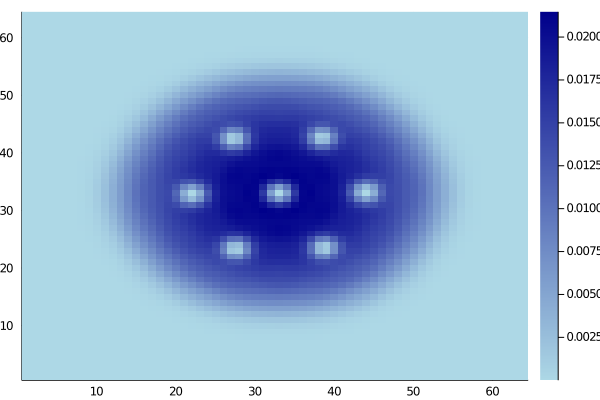

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)